Least Squares Model (NumPy):
θ0 (intercept): 6.5956
θ1 (slope): 0.001531
MSE: 0.6119

Scikit-learn Linear Regression:
Intercept: 6.5956
Coefficient: 0.001531
MSE: 0.6119


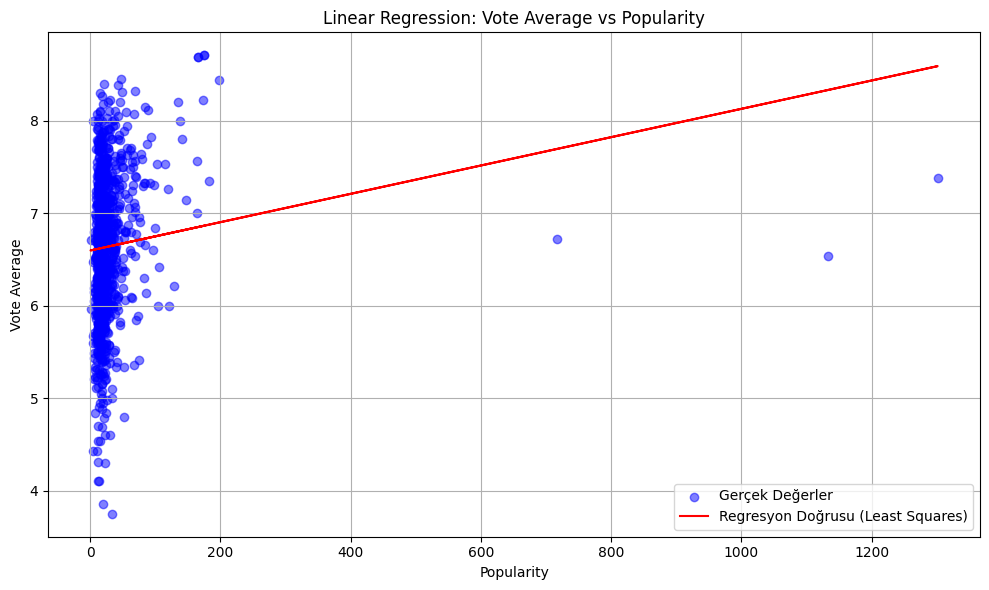

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('Top_Rated_Movies.csv')

X = df['popularity'].values
y = df['vote_average'].values

X_b = np.c_[np.ones(len(X)), X]  # Bias için 1'ler sütunu
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
y_pred_manual = X_b.dot(theta_best)
mse_manual = np.mean((y - y_pred_manual) ** 2)

print("Least Squares Model (NumPy):")
print(f"θ0 (intercept): {theta_best[0]:.4f}")
print(f"θ1 (slope): {theta_best[1]:.6f}")
print(f"MSE: {mse_manual:.4f}")

lin_reg = LinearRegression()
X_reshaped = X.reshape(-1, 1)
lin_reg.fit(X_reshaped, y)
y_pred_sklearn = lin_reg.predict(X_reshaped)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print("\nSk-learn Linear Regression:")
print(f"Intercept: {lin_reg.intercept_:.4f}")
print(f"Coefficient: {lin_reg.coef_[0]:.6f}")
print(f"MSE: {mse_sklearn:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gerçek Değerler', alpha=0.5)
plt.plot(X, y_pred_manual, color='red', label='Regresyon Doğrusu')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.title('Linear Regression: Vote Average vs Popularity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
